In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

from overlapped_classes import overlapped_classes
import json
from PIL import Image
import scipy

In [5]:
with open("./mappings/pytorch_to_imagenet_2012_id.json") as f:
    idxMap = json.load(f)

with open('imagenet_classes.txt') as f:
# with open('../mappings/imagenet_to_label_2012_v2.txt') as f:    
    labels = [line.strip() for line in f.readlines()]    

In [6]:
!pip install torchattacks

In [7]:
from torchattacks import FGSM, PGD, DeepFool, CW

In [9]:
# labels

In [10]:
# overlapped_classes
# data['Alarm clock']
# idxMap

In [11]:
# for i in overlapped_classes:
#     print(data[i] in labels)
#     print(f"{i} : {data[i]}")
# del model

In [8]:
from torchvision import models
dir(models)



# model = models.alexnet(pretrained=True)
model = models.resnet152(pretrained=True)
# model = models.inception_v3(pretrained=True)
# model = models.googlenet(pretrained=True)

model.eval()


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /Users/ali/.cache/torch/checkpoints/resnet152-b121ed2d.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
def predict_image(image_path, draw=False):
    # Define transformations for the image, should (note that imagenet models are trained with image size 224)
    transform = transforms.Compose([
#         transforms.CenterCrop(224),
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))    

    ])
    
#     import pdb; pdb.set_trace()
    if isinstance(image_path, str):
        img = Image.open(image_path).convert("RGB")
    else:
        img = image_path 
    
#     xl, yl, xr, yr = box
#     img = img.crop((xl, yl, xr, yr))   #((left, top, right, bottom)) 
    img = img.resize((224, 224))

    img_t = transform(img).float()

#     img_t = img_t.permute((0,1,2))
#     img_t = torch.transpose(img_t, 0, 1)  # rotate
    
    if draw:
        plt.imshow(img) #img_t.permute((2,1,0)) )
    # ##    plt.imshow(torch.transpose(img_t.permute((1,2,0)),  0, 1))
        plt.show()

#     print(img_t.shape)
    # Preprocess the image
#     image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all images as batches
#     image_tensor = image_tensor.unsqueeze_(0)
    image_tensor = img_t.unsqueeze_(0)

    if torch.cuda.is_available():
        image_tensor.cuda()

    # Turn the input into a Variable
#     input = Variable(image_tensor)

    # Predict the class of the image
    output = model(image_tensor)

#     index = output.data.numpy().argmax()  # top 1
    _, indices = torch.sort(output.data, descending=True)
#     [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    return indices[0][:5] # index

In [14]:
# len(data)
# dirMap[category]


In [10]:
pred = predict_image('./imgs/1.jpg')


# perform this for different levels of sigma
# invariance to edges

NameError: name 'img' is not defined

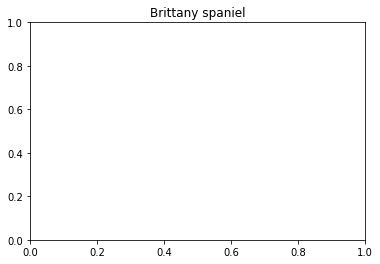

In [11]:
# Import Pillow


# img_t = img_t.permute((2,1,0))

# img_t = torch.transpose(img_t, 0, 1)

# np.clip
# img_t = torch.unsqueeze(img_t, 0)
# help(img_t.transpose)


pred = predict_image('./imgs/1.jpg')
plt.title(labels[pred[0].item()])
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

# img = cv2.imread("../images/air_freshener/01d44a4b77b44a0.png", cv2.IMREAD_UNCHANGED)
# img = cv2cvLoadImage("../images/air_freshener/01d44a4b77b44a0.png", CV_LOAD_IMAGE_UNCHANGED)


## edge detection

In [ ]:
# pip install scikit-image


In [12]:
from skimage import io, color, feature

def detect_edge(data):
    edge_maps = np.zeros_like(data)
    for idx,img in enumerate(data):
#         import pdb; pdb.set_trace()
        edge_maps[idx,0] = feature.canny(np.array(img[0], dtype=np.float64))#, sigma = 1, low_threshold=1.5) #, high_threshold=.1)

    return edge_maps

In [13]:

import cv2
def auto_canny(image, sigma=100):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

In [643]:
# Converting the image to grayscale.
import cv2

# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def detect_edge_new(img):
  fgbg = cv2.createBackgroundSubtractorMOG2(
        history=10,
        varThreshold=2,
        detectShadows=False)

  gray = np.array(img.mean(axis=2)).astype('uint8')

  # Extract the foreground
  edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
  foreground = fgbg.apply(edges_foreground)

  # Smooth out to get the moving area
  kernel = np.ones((50,50),np.uint8)
  foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)

  # Applying static edge extraction
  edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
  edges_filtered = cv2.Canny(edges_foreground, 30, 100)

  # Crop off the edges out of the moving area
  cropped = (foreground // 255) * edges_filtered

  return cropped#edges_filtered

In [678]:
def detect_edge_sobel(img):
  # image = np.array(img.mean(axis=2).cpu()*255).astype('uint8')
  # processed = ndimage.sobel(img, 0)

#   img = img.permute(1,2,0)

  gray = np.array(img.mean(axis=2)).astype('uint8')
  imgBLR = cv2.GaussianBlur(gray, (3,3), 0)
  # imgEDG = cv2.Canny(imgBLR, 30, 150) 


  # sobel
  img_sobelx = cv2.Sobel(imgBLR,cv2.CV_8U,1,0,ksize=1)
  img_sobely = cv2.Sobel(imgBLR,cv2.CV_8U,0,1,ksize=1)
  imgEDG = img_sobelx + img_sobely

  return imgEDG

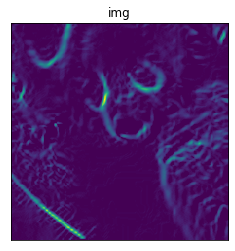

In [679]:
img_2 = np.array(img).astype('uint8')
# edge_map = detect_edge_new(img_2)
edge_map = detect_edge_sobel(img_2)
# auto_canny(img_2)

plt.title(f"img")
plt.imshow(edge_map)
plt.xticks([])
plt.yticks([])
plt.show()

## Perform the attack now and repeat

In [380]:
# PGD

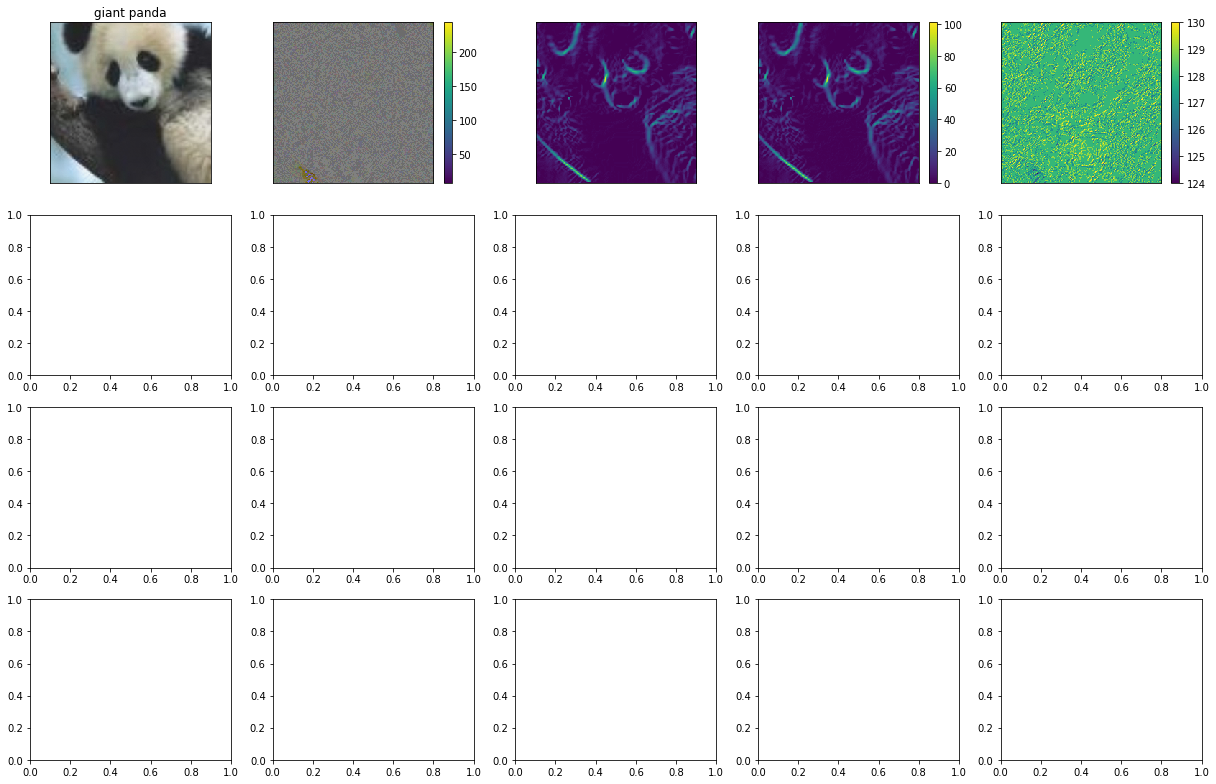

In [795]:
transform = transforms.Compose([
#         transforms.CenterCrop(224),
    transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
#     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))    

])



from PIL import Image


ff = detect_edge_sobel; #detect_edge_new
# ff = detect_edge_new


f,ax=plt.subplots(4,5,figsize=(17,11))
ax=ax.flatten()

i = 0
for eps_t in [8]: #,16,32,64]:

#     attack = FGSM(model, eps=eps_t/255)
#     attack = PGD(model, eps=eps_t/255, alpha=8/255, iters=40)
#     attack = DeepFool(model, iters=10)
    attack = CW(model, targeted=False, c=1e-4, kappa=0, iters=1000, lr=0.01)    
    
    img = Image.open(f'./imgs/panda.jpg').convert('RGB')
    pred = predict_image(f'./imgs/panda.jpg')


#     # image
#     ax[i].imshow(img)
# #     ax[i].set_title(labels[pred[0].item()])
#     ax[i].set_xticks([])
#     ax[i].set_yticks([])    
#     i +=1

    # prediction
    img_adv = attack(transform(img).unsqueeze(0),torch.tensor([pred[0].item()]))
    # img_adv = img_adv - torch.tensor((0.485, 0.456, 0.406))
    output = model(img_adv)
    #     index = output.data.numpy().argmax()  # top 1
    _, indices = torch.sort(output.data, descending=True)
    pred = indices[0][:5]
    # plt.title(labels[pred[0].item()])
    # plt.imshow(img_adv[0].permute(1,2,0))
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()
    ax[i].imshow(img_adv[0].permute(1,2,0))
    ax[i].set_xticks([])
    ax[i].set_yticks([])    
    aa = labels[pred[0].item()].split(',')
    ax[i].set_title(aa[0])    
    i +=1









    # plt.title('diference')
    # plt.imshow(img_adv[0].permute(1,2,0)*255 - np.array(img))
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()


# #     plt.title('diference')
#     img = np.array(img)/255.
#     img = (img - img.min()) / (img.max() - img.min())
#     # diff = torch.norm((img_adv[0].permute(1,2,0) - img), p=2, dim=2)
# #     diff = torch.abs(img_adv[0].permute(1,2,0) - img)
#     diff = torch.norm(torch.abs(img_adv[0].permute(1,2,0) - img), p=2, dim=2)
#     # diff = diff.sum(axis = 2)
# #     diff = (diff - diff.min()) / (diff.max() - diff.min())




# # new
#     am_ad = np.array(img_adv[0].permute(1,2,0)*255).astype('uint8')
#     I = np.array(img).astype('uint8')

#     # plt.imshow(am_ad/255.)
#     # plt.imshow(I/255.)

#     diff = (am_ad - I)
#     # diff = torch.Tensor(diff)
#     # diff = torch.norm(diff, p=2, dim=2)

#     diff = diff/1.
# #     diff = diff * . 
#     # diff =  diff + 128.
#     # diff = torch.clamp(diff,0,255)
#     diff[diff>255] = 255.
#     diff[diff<0] = 0
#     diff = diff/255.


    am_ad = np.array(img_adv[0].permute(1,2,0)*255).astype('uint8')
    I = np.array(img).astype('uint8')
    diff = (am_ad - I)
    diff = np.array(diff).astype('int8')

    diff *= 20
    diff =  diff + 128
    diff[diff>255] = 255
    diff[diff<0] = 0

    im = ax[i].imshow(diff)
    if eps_t == 8:
        f.colorbar(im, ax=ax[i])

    if i==0:
        ax[i].set_title('diff image')
    ax[i].set_xticks([])
    ax[i].set_yticks([])    
    
    i +=1














    # img = np.array(img*255)
    # img_2 = np.array(img).astype('uint8')
    # edge_map = auto_canny(img_2)
#     img_2 = np.array(am_ad)#.astype('uint8')


    edge_map = ff(I)
#     edge_map = detect_edge_sobel(I)
    
    

    # plt.title(f"img")
    # plt.imshow(edge_map)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()


    im = ax[i].imshow(edge_map)
#     if eps_t == 8:
#     f.colorbar(im, ax=ax[i])
    if i==0:    
        ax[i].set_title('edge map')
    ax[i].set_xticks([])
    ax[i].set_yticks([])    
    
    i +=1
















    # img_avd_2 = np.array(img_adv*255.).astype('uint8')
    # edge_map_adv = auto_canny(img_avd_2[0].transpose(1,2,0))
#     img_avd_2 = np.array(img_adv)#.astype('uint8')/255.
    edge_map_adv = ff(am_ad)
#     edge_map_adv = detect_edge_sobel(am_ad)    
    


    # plt.title(f"fgsm eps={8/256}")
    # plt.imshow(edge_map_adv)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()

    edge_map_adv = np.array(edge_map_adv).astype('uint8')
    im = ax[i].imshow(edge_map_adv)
    if eps_t == 8:
        f.colorbar(im, ax=ax[i])
    if i==0:    
        ax[i].set_title('edge map adversarial')
    ax[i].set_xticks([])
    ax[i].set_yticks([])    
    i +=1











#     plt.title(f"edge map diff")
#     plt.imshow(edge_map-edge_map_adv)
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()


#     edge_map_adv = (edge_map_adv - edge_map_adv.min()) / (edge_map_adv.max() - edge_map_adv.min())
#     edge_map = (edge_map - edge_map.min()) / (edge_map.max() - edge_map.min())    


    diff_edge = (edge_map_adv-edge_map)
    diff_edge = np.array(diff_edge).astype('uint8')

#     diff *= 20
    diff_edge += 128
    diff_edge[diff_edge>255] = 255
    diff_edge[diff_edge<0] = 0


    im = ax[i].imshow(diff_edge)
    if eps_t == 8:
        f.colorbar(im, ax=ax[i])

    if i==0:    
        ax[i].set_title('diff edge map')
    ax[i].set_xticks([])
    ax[i].set_yticks([])    
    
    i +=1


f.tight_layout()    

255  ,0
255  ,0
255 , 0


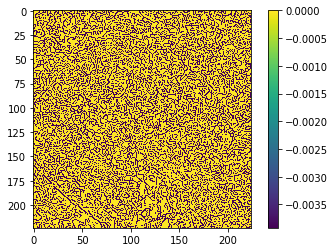

0  ,-1
0  ,-1
1  ,-1


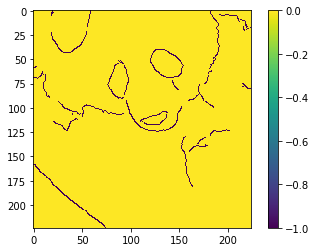

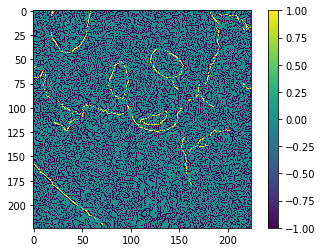

In [780]:
# img_adv[0].permute(1,2,0).max()

print(f'{edge_map_adv.max()}  ,{edge_map_adv.min()}' )
print(f'{edge_map.max()}  ,{edge_map.min()}' )

diff_edge = (edge_map_adv - edge_map)
# diff_edge +=128
print(f'{diff_edge.max()} , {diff_edge.min()}' )

# edge_map_adv += 128
edge_map_advA = np.array(edge_map_adv).astype('int8'); #edge_map_advA += 128
edge_mapA = np.array(edge_map).astype('int8'); #edge_mapA += 128
diff_edgeA = np.array(diff_edge).astype('int8'); #diff_edgeA += 128

plt.imshow(edge_map_advA/255.)
plt.colorbar()
plt.show()
# diff
print(f'{edge_map_advA.max()}  ,{edge_map_advA.min()}' )
print(f'{edge_mapA.max()}  ,{edge_mapA.min()}' )
print(f'{diff_edgeA.max()}  ,{diff_edgeA.min()}' )




plt.imshow(edge_mapA)
plt.colorbar()
plt.show()


plt.imshow(diff_edgeA)
plt.colorbar()
plt.show()

In [778]:
np.unique(edge_map_adv)

array([  0, 255], dtype=uint8)

In [621]:
print(f'{am_ad.max()}  ,{am_ad.min()}' )
print(f'{np.array(I).max()}  ,{np.array(I).min()}' )
print(f'{diff.max()}  ,{diff.min()}' )
diff.shape
edge_map.shape
# img_adv[0]
diff

255  ,22
255  ,22
128  ,127


array([[[127, 127, 127],
        [128, 127, 127],
        [127, 127, 127],
        ...,
        [128, 127, 127],
        [127, 127, 127],
        [127, 128, 128]],

       [[128, 127, 127],
        [128, 127, 127],
        [127, 127, 127],
        ...,
        [128, 128, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[128, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [128, 128, 127],
        [127, 127, 127],
        [127, 128, 128]],

       ...,

       [[128, 128, 127],
        [128, 128, 127],
        [127, 128, 127],
        ...,
        [128, 128, 128],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [127, 128, 127],
        [128, 128, 128],
        [128, 128, 128]],

       [[128, 128, 128],
        [128, 128, 128],
        [128, 128, 128],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [127, 128, 127]]

In [49]:
# I = transform(img).permute(1,2,0)*255

In [626]:
print(f'{diff.max()}  ,{diff.min()}' )
print(diff.shape)
# print(f'{xx.max()}  ,{xx.min()}' )
print(f'{I.max()}  ,{I.min()}' )
print(f'{am_ad.max()}  ,{am_ad.min()}' )

128  ,127
(224, 224, 3)
255  ,22
255  ,22


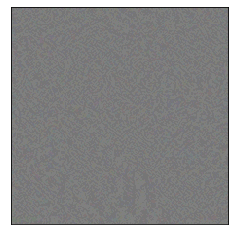

In [634]:
# attack = FGSM(model, eps=64/255)
# img = Image.open(f'./imgs/panda.jpg').convert('RGB')
# img_adv = attack(transform(img).unsqueeze(0),torch.tensor([pred[0].item()]))*255
# am_ad = img_adv[0].permute(1,2,0)

# am_ad = np.array(am_ad).astype('uint8')
# I = np.array(img).astype('uint8')

# plt.imshow(am_ad/255.)
# plt.imshow(I/255.)

diff = (am_ad - I)
diff = np.array(diff).astype('int8')

# diff = torch.Tensor(diff/255.)
# diff = torch.norm(diff, p=2, dim=2)

# # diff = diff
diff = diff * 10
diff =  diff + 128
# # diff = torch.clamp(diff,0,255)
diff[diff>255] = 255
diff[diff<0] = 0

# diff *= 255.
# diff = (diff - diff.min()) / (diff.max() - diff.min())

plt.xticks([])
plt.yticks([])
plt.imshow(diff)
# plt.cmap('jet')


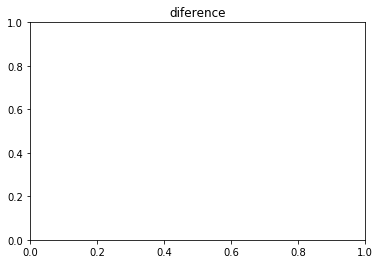

In [504]:
plt.title('diference')
# diff = torch.norm(img_adv[0].permute(1,2,0)*255 - np.array(img)/1.)
img = Image.open(f'./imgs/panda.jpg').convert('RGB')
img_adv = attack(transform(img).unsqueeze(0),torch.tensor([pred[0].item()]))*255
am_ad = img_adv[0].permute(1,2,0)
# am_ad = (am_ad - am_ad.min()) / (am_ad.max() - am_ad.min())

# am_ad += .5

# am_ad = torch.clamp(am_ad,0,1)

# img = np.array(img)/255.
# img = (img - img.min()) / (img.max() - img.min())
# diff = torch.norm(torch.abs(img_adv[0].permute(1,2,0) - img), p=2, dim=2)
# # diff = torch.abs(img_adv[0].permute(1,2,0) - img)
# # diff = diff.sum(axis = 2)
# # diff = (diff - diff.min()) / (diff.max() - diff.min())

# # diff = torch.abs(diff/diff.max())
# # diff = img_adv[0].permute(1,2,0)*255 - np.array(img)
# plt.imshow(diff) #, cmap='Set1')
# plt.xticks([])
# plt.yticks([])
# plt.colorbar()
# plt.show()

In [24]:
# (np.array(img)/255.).dtype
am_ad.max()

tensor(1.)

In [571]:
# torch.abs(diff.max())
diff.max()
edge_map.max()
# (img_adv[0].permute(1,2,0)*255).max()
# np.array(img).max()
# np.array(img).min()
# (img_adv[0].permute(1,2,0)*255).min()
# diff.shape
edge_map_adv.max()
print(f'{diff_edge.max()}  ,{diff_edge.min()}' )



255  ,128


In [569]:
np.unique(edge_map)

array([  0, 255], dtype=uint8)

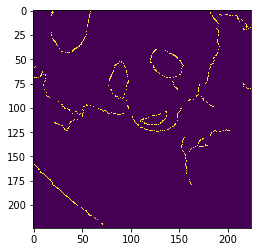

In [570]:
diff_edge = (edge_map-edge_map_adv)
# diff_edge = np.array(diff_edge).astype('int8')
diff_edge[diff_edge<255]= 128
plt.imshow(diff_edge)

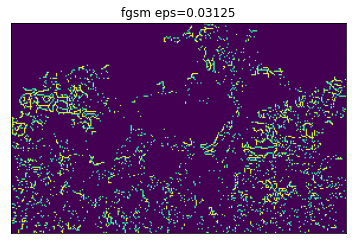

In [354]:
plt.title(f"fgsm eps={8/256}")
plt.imshow(edge_map-edge_map_adv)
plt.xticks([])
plt.yticks([])
plt.show()


In [336]:
np.array(img).max()
img_avd_2.shape

(1, 3, 178, 283)

In [264]:
img = Image.open("./imgs/1.jpg").convert('RGB')
np.array(img_adv).astype('uint8').dtype

dtype('uint8')

In [266]:
img_avd_2.dtype

dtype('uint8')

In [370]:
inp = cv2.dnn.blobFromImage(np.array(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


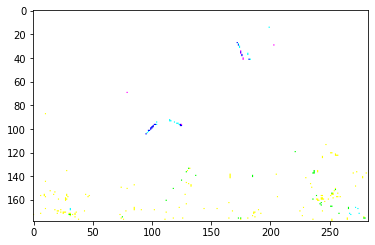

In [374]:
plt.imshow(inp[0].transpose(1,2,0))

In [376]:
net.setInput(inp)
out = net.forward()
out = out[0, 0]
out = cv.resize(out, (frame.shape[1], frame.shape[0]))
out = 255 * out
out = out.astype(np.uint8)
out=cv.cvtColor(out,cv.COLOR_GRAY2BGR)
con=np.concatenate((frame,out),axis=1)
cv.imshow(kWinName,con)

NameError: name 'net' is not defined

In [378]:
!sh download_pretrained.sh

sh: download_pretrained.sh: No such file or directory


In [362]:
a, b = torch.sort(output.data, descending=True)

In [363]:
a

tensor([[ 9.7593e+00,  9.6543e+00,  9.1525e+00,  8.3022e+00,  7.8526e+00,
          7.1581e+00,  7.0438e+00,  6.8251e+00,  6.6446e+00,  6.5261e+00,
          6.3801e+00,  6.0878e+00,  5.9686e+00,  5.7808e+00,  5.6799e+00,
          5.6714e+00,  5.6545e+00,  5.5583e+00,  5.5370e+00,  5.5116e+00,
          5.4790e+00,  5.3247e+00,  5.1653e+00,  5.0831e+00,  4.9691e+00,
          4.9601e+00,  4.9347e+00,  4.9071e+00,  4.9040e+00,  4.8840e+00,
          4.8130e+00,  4.7239e+00,  4.7052e+00,  4.4857e+00,  4.4277e+00,
          4.4022e+00,  4.3954e+00,  4.3712e+00,  4.3672e+00,  4.3513e+00,
          4.2937e+00,  4.2894e+00,  4.2723e+00,  4.2615e+00,  4.1982e+00,
          4.1410e+00,  4.0936e+00,  4.0465e+00,  4.0456e+00,  4.0340e+00,
          4.0089e+00,  3.9542e+00,  3.9430e+00,  3.9085e+00,  3.8940e+00,
          3.8603e+00,  3.8590e+00,  3.8132e+00,  3.7638e+00,  3.6992e+00,
          3.6368e+00,  3.6201e+00,  3.6011e+00,  3.5920e+00,  3.5865e+00,
          3.5712e+00,  3.5605e+00,  3.

In [373]:
a[0,0]/sum(a[0])

tensor(0.0023)

In [365]:
a.shape

torch.Size([1, 1000])

In [366]:
b

tensor([[443, 591, 700, 735, 640, 539,   6, 824, 911, 999, 904, 794, 434, 490,
         748,   5, 893, 977, 721, 669, 741, 750, 533, 327, 828, 411, 284, 549,
         109, 636, 474, 610, 107,  69, 679, 588, 496, 712, 556, 620, 606, 452,
         446, 861, 868, 792, 841, 921, 619, 973, 772, 601, 655, 608, 545, 842,
         414, 932, 237, 646, 611, 419, 314, 811, 793, 599, 328, 463, 589, 885,
         658, 457, 643, 111, 108, 459, 529, 487, 971, 605, 797, 906, 117, 397,
         913, 223, 855,  78, 775, 431,  65, 806, 632, 171, 728, 778, 709, 481,
         840, 884, 887, 551, 499, 898, 329,   4, 896, 892, 600, 787, 678, 461,
         808, 774, 659, 465, 552, 761, 746, 464, 816, 488, 813, 178, 815, 845,
          33, 192, 440, 577, 838,  34, 112, 714, 199, 259, 796, 596, 515, 818,
         725, 882, 542, 538, 567, 673, 541, 689, 765, 516, 116, 786, 834, 285,
         692, 318, 753, 918, 158, 574, 695, 168, 848, 731, 524, 597,  66, 879,
         310, 399, 151, 784, 822, 684, 674, 359, 489

In [369]:
b[0,0]

tensor(443)